In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
Es = 1

In [5]:
eb_no_db = np.arange(0,25)

In [6]:
RxMF_capacity = np.zeros(len(eb_no_db))
RxZF_capacity = np.zeros(len(eb_no_db))
RxMMSE_capacity = np.zeros(len(eb_no_db))

In [7]:
def calculate_capacity(nTx,nRx,Rz_inverse):
    
    total_capacity = 0
    
    for ii in range(N):

        H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))

        H_hermitian = np.conjugate(H)

        H_hermitian = np.transpose(H_hermitian)

        Ns = 4

        
                        

        P = np.sqrt(Es / Ns) * np.block([
                   [np.eye(Ns), np.zeros((Ns, nTx - Ns))],
                   [np.zeros((nTx - Ns, nTx))]
                    ])

        P_hermitian = np.conjugate(P)

        P_hermitian = np.transpose(P_hermitian)

        X = np.eye(4)

        Y = P_hermitian @ H_hermitian @ Rz_inverse @ H @ P

        Z = X + Y

        Z = np.linalg.det(Z)

        c = np.log2(np.abs(Z))
        
        total_capacity = total_capacity + c 
        
    return total_capacity
    

In [8]:
def Rx_MF ():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 4
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity(nTx,nRx,Rz_inverse)
        
        capacity = capacity / N
        
        RxZF_capacity[jj] = capacity
        
    return RxZF_capacity
    
        
        
            
            
            
            
            

In [9]:
def Rx_ZF ():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 4
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity(nTx,nRx,Rz_inverse)
        
        capacity = capacity / N
        
        RxMF_capacity[jj] = capacity
        
    return RxMF_capacity

In [10]:
def Rx_MMSE ():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 4
        
        Rz = noise_variance * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = calculate_capacity(nTx,nRx,Rz_inverse)
        
        capacity = capacity / N
        
        
        RxMMSE_capacity[jj] = capacity
        
    return RxMMSE_capacity

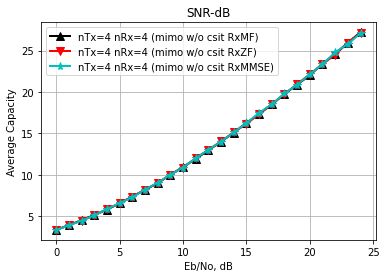

In [11]:
rxmf = Rx_MF ()
rxzf = Rx_ZF()
rxmmse =Rx_MMSE ()

plt.figure()
plt.plot(eb_no_db, rxmf, 'k^-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (mimo w/o csit RxMF)')
plt.plot(eb_no_db, rxzf, 'rv-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (mimo w/o csit RxZF)')
plt.plot(eb_no_db, rxmmse, 'c*-', linewidth=2, markersize=8, label='nTx=4 nRx=4 (mimo w/o csit RxMMSE)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Average Capacity')
plt.title('SNR-dB')
plt.show()